In [53]:
import numpy as np
import scipy
import os
import simulation_scripts
import matplotlib.pyplot as plt
from cycler import cycler
import importlib
importlib.reload(simulation_scripts)

<module 'simulation_scripts' from '/Users/ruby/Astro/requantization_sim/simulation_scripts.py'>

In [54]:
plt.rcParams["font.size"] = 12
color_array = [
    "tab:blue",
    "tab:red",
    "tab:purple",
    "tab:orange",
    "tab:cyan",
    "tab:pink",
    "tab:olive",
]
plt.rcParams["axes.prop_cycle"] = cycler(color=color_array)

# Summary Plots

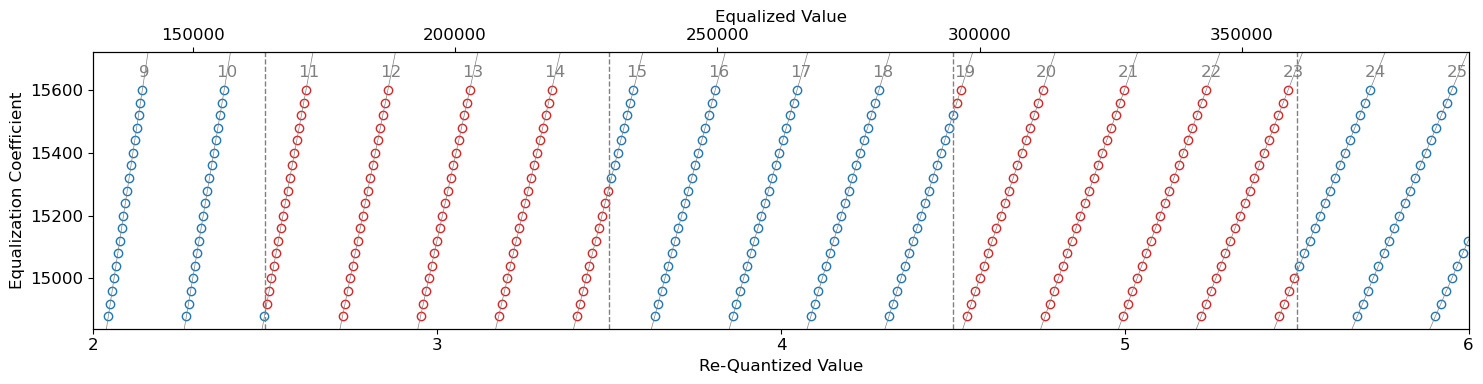

In [55]:
requantization_gain = 2**16
equalization_coeffs = np.arange(15000-160, 15640 + 2.5*40, 40)

fig = plt.figure(figsize=(15,4))
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

for equalization_coeff in equalization_coeffs[1:-3]:

    equalized_values = np.arange(-100, 100) * equalization_coeff
    even_values = equalized_values[np.where(np.round(equalized_values/requantization_gain)%2 == 0)]
    odd_values = equalized_values[
        np.where(np.round(equalized_values / requantization_gain) % 2 != 0)
    ]
    ax1.plot(
        even_values/requantization_gain,
        np.full_like(even_values, equalization_coeff),
        "o",
        markerfacecolor="none",
        color="tab:blue"
    )
    ax1.plot(
        odd_values / requantization_gain,
        np.full_like(odd_values, equalization_coeff),
        "o",
        markerfacecolor="none",
        color="tab:red"
    )

for int_value in np.arange(-100, 100):
    x_array = int_value * equalization_coeffs / requantization_gain
    ax1.plot(x_array, equalization_coeffs, "-", color="grey", linewidth=0.5)
    ax1.annotate(
        str(int_value),
        xy=(x_array[-3], equalization_coeffs[-3]),
        xycoords="data",
        ha="center",
        color="grey"
    )
for boundary_value in np.arange(2, 6) + 0.5:
    ax1.plot(
        [boundary_value, boundary_value],
        [np.min(equalization_coeffs), np.max(equalization_coeffs)],
        "--",
        color="grey",
        linewidth=1,
    )

ax1.set_xticks(np.arange(-7, 8))
ax1.set_xlim((2, 6))
ax1.set_ylim((np.min(equalization_coeffs), np.max(equalization_coeffs)))
ax1.set_xlabel("Re-Quantized Value")
ax1.set_ylabel("Equalization Coefficient")
ax2.set_xlim(np.array(ax1.get_xlim()) * requantization_gain)
ax2.set_xlabel("Equalized Value")
# ax1.grid()
plt.tight_layout()
plt.savefig("/Users/ruby/Downloads/requantization_value_drift.png", dpi=300)

In [56]:
print(np.min(equalization_coeffs[1:-3]))
print(np.max(equalization_coeffs[1:-3]))

14880.0
15600.0


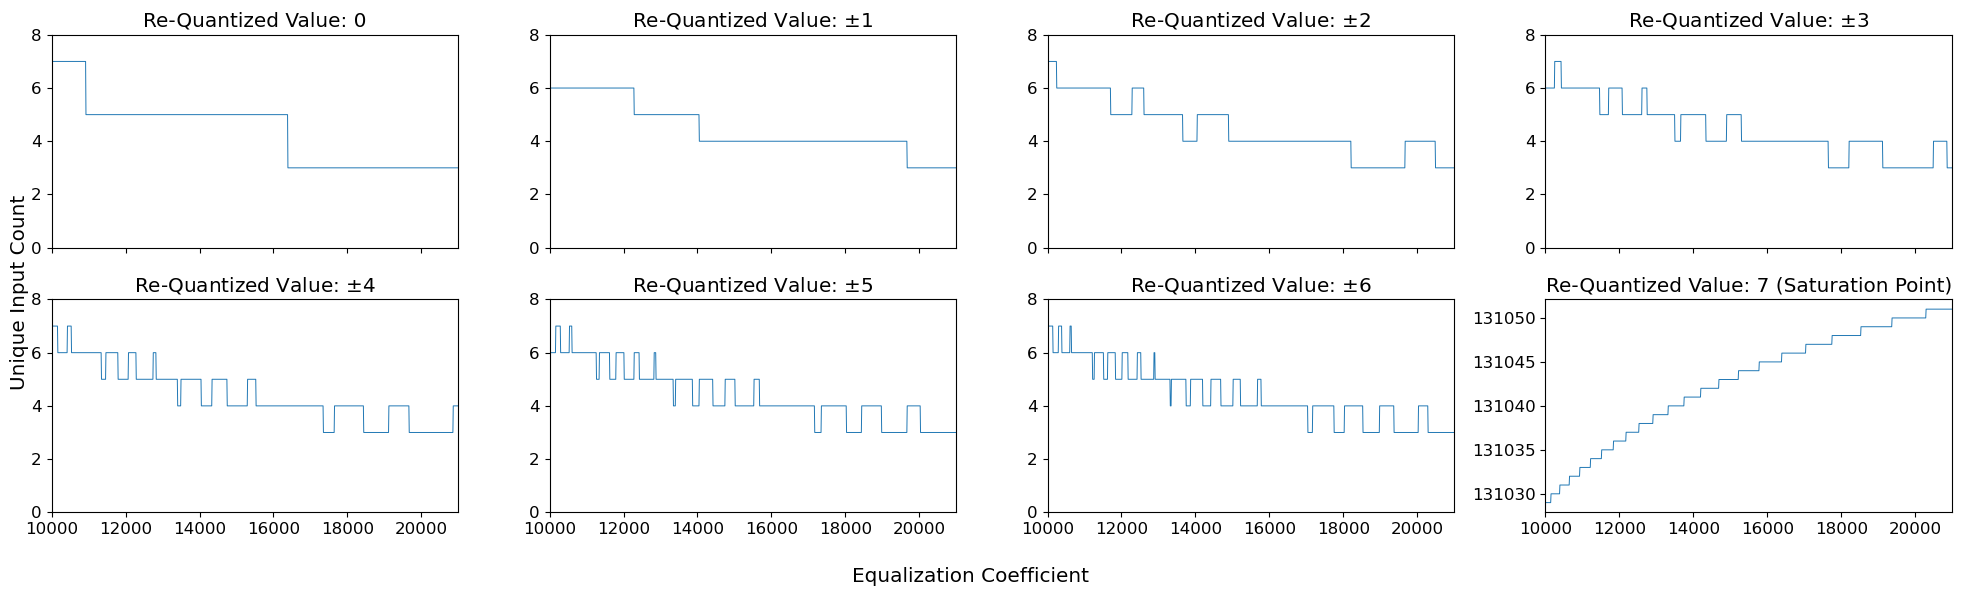

In [57]:
eq_coeffs = np.arange(10000, 21000, 10)
use_requantized_value_options = simulation_scripts.get_quantized_value_options(
    4,
    0,
    signed=True,
    enforce_symmetry=True,
)
quantized_xvals = simulation_scripts.get_quantized_value_options(
    18,
    0,
    signed=True,
    enforce_symmetry=False,
)
requantization_gain = 2**16

number_of_values = np.zeros(
    (len(eq_coeffs), len(use_requantized_value_options)), dtype=int
)

for coeff_ind, eq_coeff in enumerate(eq_coeffs):
    requantized_values = simulation_scripts.quantize(
        quantized_xvals * eq_coeff / requantization_gain,
        4,
        0,
        signed=True,
        enforce_symmetry=True,
    )
    for output_ind, output in enumerate(use_requantized_value_options):
        number_of_values[coeff_ind, output_ind] = len(
            np.where(requantized_values == output)[0]
        )

fig, ax = plt.subplots(ncols=4, nrows=2, figsize=(20, 6), sharey=False, sharex=True)
plot_requantized_inds = [7, 8, 9, 10, 11, 12, 13, 14]
for plot_ind, output_ind in enumerate(plot_requantized_inds):
    output_value = int(use_requantized_value_options[output_ind])
    use_ax = ax.flatten()[plot_ind]
    use_ax.plot(
        eq_coeffs,
        number_of_values[:, output_ind],
        "-",
        linewidth=0.7,
        label=use_requantized_value_options[output_ind],
    )
    if output_ind in [7]:
        use_ax.set_title(f"Re-Quantized Value: {output_value}")
    elif output_ind in [14]:
        use_ax.set_title(f"Re-Quantized Value: {output_value} (Saturation Point)")
    else:
        use_ax.set_title(f"Re-Quantized Value: $\pm${output_value}")
    # if output_ind not in [7, 11, 14]:
    #    use_ax.get_yaxis().set_visible(False)
    use_ax.set_xlim([np.min(eq_coeffs), np.max(eq_coeffs)])
    if output_ind != 14:
        use_ax.set_ylim([0, 8])
plt.ticklabel_format(useOffset=False)

fig.supxlabel("Equalization Coefficient")
fig.supylabel("Unique Input Count")
plt.tight_layout()
plt.savefig("/Users/ruby/Downloads/unique_values_hist.png", dpi=300)

# Simulation Code

Processing frequency 1 of 28000.
Processing frequency 2 of 28000.
Processing frequency 3 of 28000.
Processing frequency 4 of 28000.
Processing frequency 5 of 28000.
Processing frequency 6 of 28000.
Processing frequency 7 of 28000.
Processing frequency 8 of 28000.
Processing frequency 9 of 28000.
Processing frequency 10 of 28000.
Processing frequency 11 of 28000.
Processing frequency 12 of 28000.
Processing frequency 13 of 28000.
Processing frequency 14 of 28000.
Processing frequency 15 of 28000.
Processing frequency 16 of 28000.
Processing frequency 17 of 28000.
Processing frequency 18 of 28000.
Processing frequency 19 of 28000.
Processing frequency 20 of 28000.
Processing frequency 21 of 28000.
Processing frequency 22 of 28000.
Processing frequency 23 of 28000.
Processing frequency 24 of 28000.
Processing frequency 25 of 28000.
Processing frequency 26 of 28000.
Processing frequency 27 of 28000.
Processing frequency 28 of 28000.
Processing frequency 29 of 28000.
Processing frequency 30

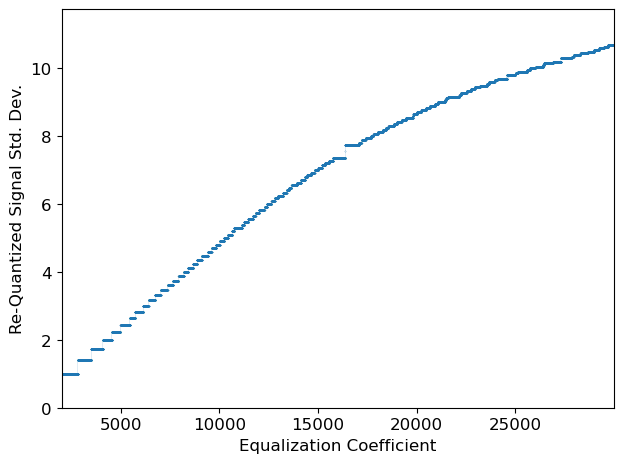

In [58]:
# Increase bit depth

equalization_coeffs = np.arange(2000, 30000)
final_variances, final_autocorrs = simulation_scripts.requantization_sim(
    np.full_like(equalization_coeffs, 16, dtype=float),
    equalization_coeffs,
    input_bits_total=18,
    input_bits_fractional=0,
    output_bits_total=5,
    output_bits_fractional=0,
    requantization_gain=2**15,
)
plt.plot(
    equalization_coeffs,
    np.sqrt(final_variances),
    ".-",
    markersize=0.3,
    linewidth=0.1,
)
plt.ylim([0, 1.1 * np.max(np.sqrt(final_variances))])
plt.xlim([np.min(equalization_coeffs), np.max(equalization_coeffs)])
plt.xlabel("Equalization Coefficient")
plt.ylabel("Re-Quantized Signal Std. Dev.")
plt.tight_layout()
plt.show()

# Instrument Simulation

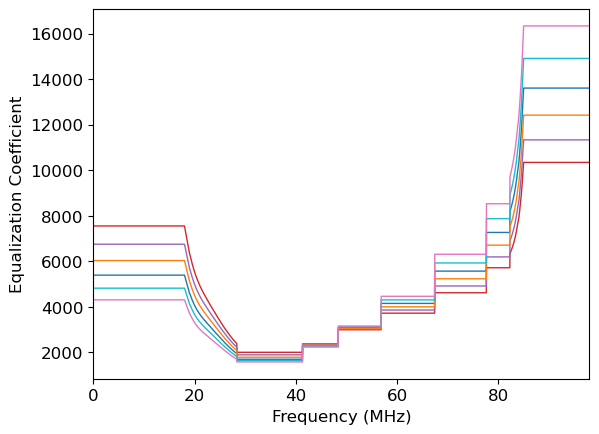

In [59]:
current_dir = os.getcwd()
# eq_coeffs_mat = scipy.io.loadmat(f"{current_dir}/20250612-settingsAll-day_smoothed.mat")
eq_coeffs_mat = scipy.io.loadmat(f"{current_dir}/20251120f-settingsAll-night-FW7p5")  # Piecewise constant
channel_width_mhz = 23925.78125 * 1e-6
freq_array = np.arange(len(eq_coeffs_mat["coef"][0, :])) * channel_width_mhz
for ind in range(6):
    plt.plot(freq_array, eq_coeffs_mat["coef"][ind, :], "-", linewidth=1)
plt.xlim([np.min(freq_array), np.max(freq_array)])
plt.xlabel("Frequency (MHz)")
plt.ylabel("Equalization Coefficient")
plt.savefig("/Users/ruby/Downloads/eq_coeffs_piecewise.png", dpi=300)

use_eq_coeffs = eq_coeffs_mat["coef"][0, :]

(0.0, 97.97607421875)

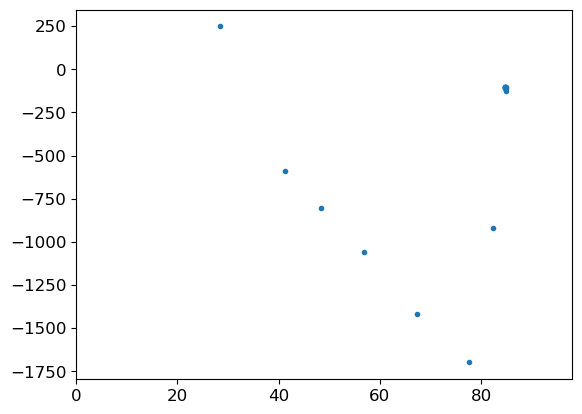

In [60]:
eq_coeff_diff = eq_coeffs_mat["coef"][0, :-1] - eq_coeffs_mat["coef"][0, 1:]
nonzero_inds = np.where(np.abs(eq_coeff_diff) > 100)[0]
plt.plot(freq_array[nonzero_inds], eq_coeff_diff[nonzero_inds], ".")
plt.xlim([np.min(freq_array), np.max(freq_array)])

In [61]:
print(freq_array[nonzero_inds])

[28.328125   41.29589844 48.35400391 56.82373047 67.39892578 77.61523438
 82.25683594 84.64941406 84.67333984 84.69726562 84.72119141 84.74511719
 84.76904297 84.91259766 84.93652344 84.96044922]


In [62]:
print(channel_width_mhz)

0.02392578125


In [63]:
requantization_gain = 2**16
target_value = 3 * requantization_gain  # Ideal stddev for the 4-bit quantization
print(target_value)

196608


dB variation: 18.12312127604963
dB variation: 14.29156185117236
dB variation: 15.583232450986163
dB variation: 16.877927669345137
dB variation: 19.22763630379295
dB variation: 20.334753421156


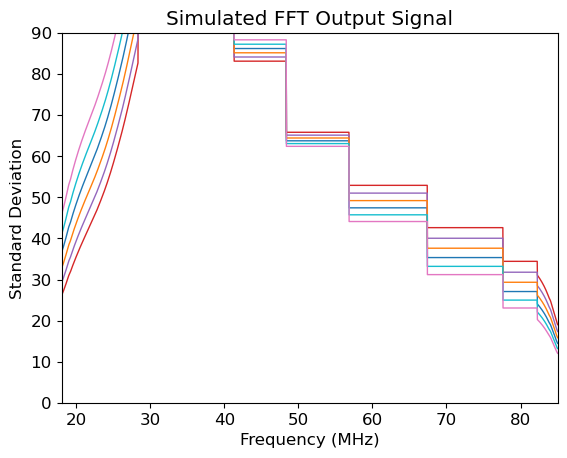

In [64]:
for ind in range(6):
    data_stddev = target_value / eq_coeffs_mat["coef"][ind, :]
    print(f"dB variation: {10*np.log10((np.max(data_stddev)/np.min(data_stddev))**2)}")
    plt.plot(freq_array, data_stddev, "-", linewidth=1)
plt.xlim([18, 85])
plt.ylim([0, 90])
plt.xlabel("Frequency (MHz)")
plt.ylabel("Standard Deviation")
plt.title("Simulated FFT Output Signal")
plt.savefig("/Users/ruby/Downloads/simulation_input.png", dpi=300)

In [65]:
final_variances, final_autocorrs = simulation_scripts.requantization_sim(
    data_stddev[2000:2100],
    use_eq_coeffs[2000:2100],
    input_bits_total=18,
    input_bits_fractional=0,
    eq_coeff_bits_total=14,
    eq_coeff_bits_fractional=0,
    output_bits_total=4,
    output_bits_fractional=0,
    requantization_gain=requantization_gain,
)  # Run simulation

Processing frequency 1 of 100.
Processing frequency 2 of 100.
Processing frequency 3 of 100.
Processing frequency 4 of 100.
Processing frequency 5 of 100.
Processing frequency 6 of 100.
Processing frequency 7 of 100.
Processing frequency 8 of 100.
Processing frequency 9 of 100.
Processing frequency 10 of 100.
Processing frequency 11 of 100.
Processing frequency 12 of 100.
Processing frequency 13 of 100.
Processing frequency 14 of 100.
Processing frequency 15 of 100.
Processing frequency 16 of 100.
Processing frequency 17 of 100.
Processing frequency 18 of 100.
Processing frequency 19 of 100.
Processing frequency 20 of 100.
Processing frequency 21 of 100.
Processing frequency 22 of 100.
Processing frequency 23 of 100.
Processing frequency 24 of 100.
Processing frequency 25 of 100.
Processing frequency 26 of 100.
Processing frequency 27 of 100.
Processing frequency 28 of 100.
Processing frequency 29 of 100.
Processing frequency 30 of 100.
Processing frequency 31 of 100.
Processing freque

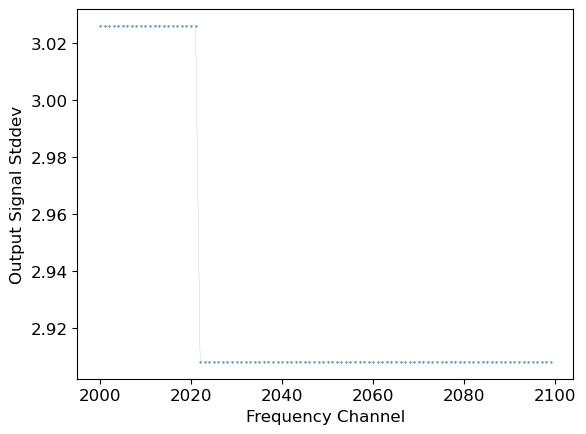

In [66]:
plt.plot(
    np.arange(2000, 2100),
    np.sqrt(final_variances),
    ".-",
    markersize=1,
    linewidth=0.1,
    color="tab:blue",
)
plt.xlabel("Frequency Channel")
plt.ylabel("Output Signal Stddev")
plt.show()

In [67]:
# Test increasing the bit depth
if False:
    final_variances, final_autocorrs = simulation_scripts.requantization_sim(
        data_stddev[2000:2100],
        use_eq_coeffs[2000:2100],
        input_bits_total=18,
        input_bits_fractional=0,
        eq_coeff_bits_total=14,
        eq_coeff_bits_fractional=0,
        output_bits_total=5,
        output_bits_fractional=0,
        requantization_gain=requantization_gain / 2,
    )  # Run simulation

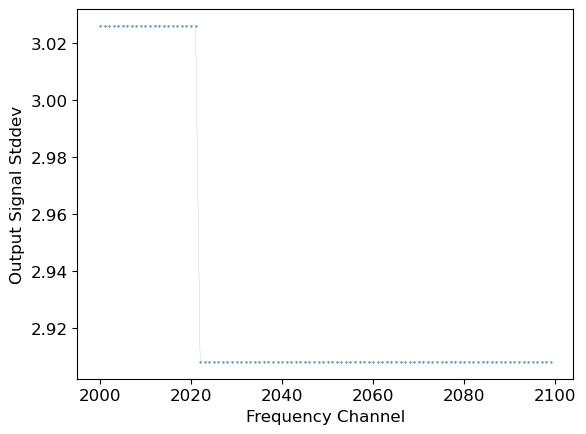

In [68]:
plt.plot(
    np.arange(2000, 2100),
    np.sqrt(final_variances),
    ".-",
    markersize=1,
    linewidth=0.1,
    color="tab:blue",
)
plt.xlabel("Frequency Channel")
plt.ylabel("Output Signal Stddev")
plt.show()

In [69]:
# Try dithering
if False:
    dither_stddev = 2**-17 * np.mean(use_eq_coeffs[2000:2100]) / 10  # Set stddev proportional to the peak separation
    final_variances, final_autocorrs = simulation_scripts.requantization_sim(
        np.full_like(data_stddev[2000:2100], data_stddev[2000]),
        use_eq_coeffs[2000:2100],
        dither_stddev=dither_stddev,
    )

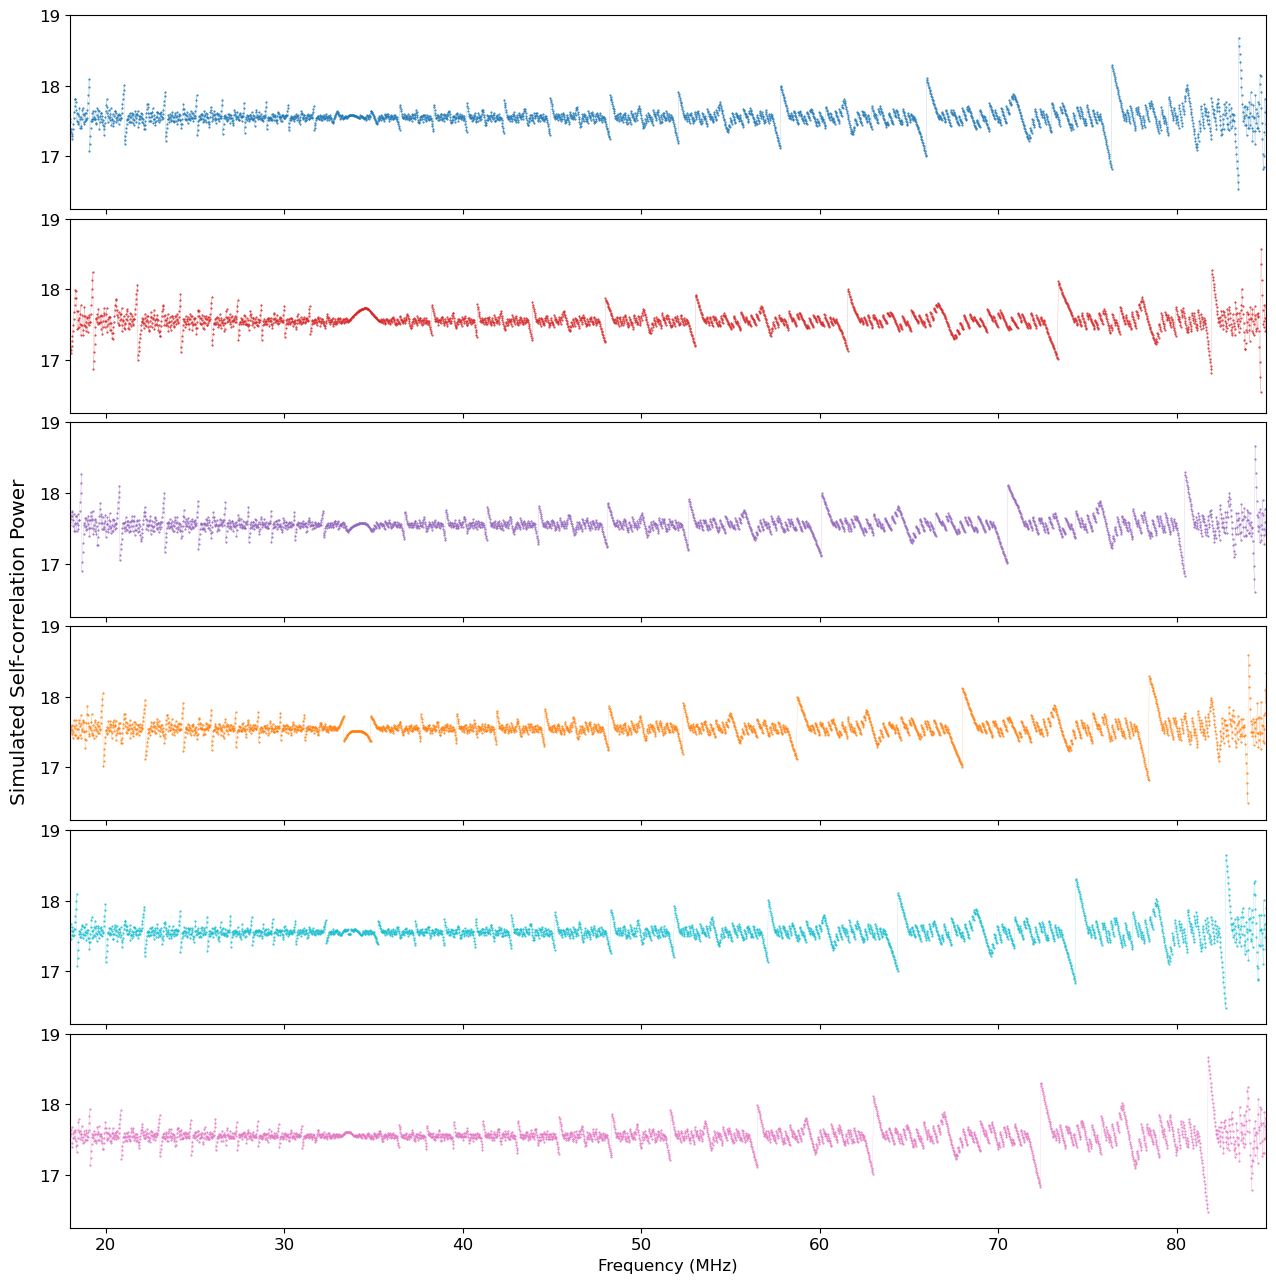

In [70]:
# Full simulation, from files
fig, ax = plt.subplots(nrows=6, figsize=(13, 13), sharex=True)

for simulation_ind in range(6):
    with open(f"simulation_output{simulation_ind}.npy", "rb") as f:
        freq_array = np.load(f)
        final_variances = np.load(f)
        final_autocorrs = np.load(f)
    f.close()

    ax[simulation_ind].plot(
        freq_array,
        final_autocorrs,
        ".-",
        markersize=1,
        linewidth=0.1,
        color=color_array[simulation_ind],
    )
    ax[simulation_ind].set_xlim([18, 85])
    ax[simulation_ind].set_ylim([16.25, 19])
plt.xlabel("Frequency (MHz)")
fig.supylabel("Simulated Self-correlation Power")
plt.tight_layout()
fig.subplots_adjust(hspace=0.05)  # Reduce vertical space between plots
# ax.set_ylim([0, 1])
plt.savefig("/Users/ruby/Downloads/simulated_output.png", dpi=300)
plt.show()

# Paper Plots

Text(0, 0.5, '4-bit Quantized Value')

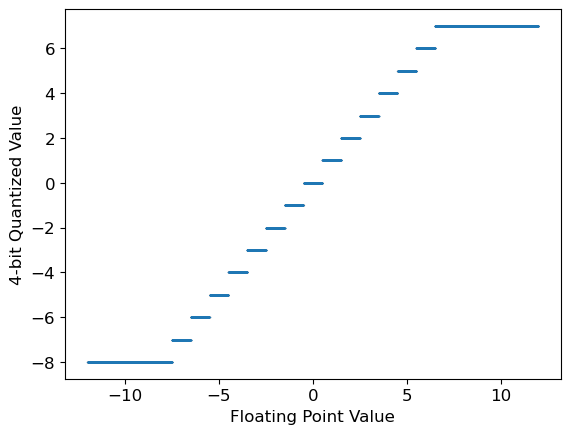

In [71]:
input_vals = np.arange(-12, 12, 0.001)
output_vals = simulation_scripts.quantize(
    input_vals,
    4,
    0,
    signed=True,
    enforce_symmetry=False,
)
plt.plot(input_vals, output_vals, ".", color="tab:blue", markersize=0.1)
plt.xlabel("Floating Point Value")
plt.ylabel("4-bit Quantized Value")
# plt.savefig("/Users/ruby/Downloads/4bit_quantization.png", dpi=300)

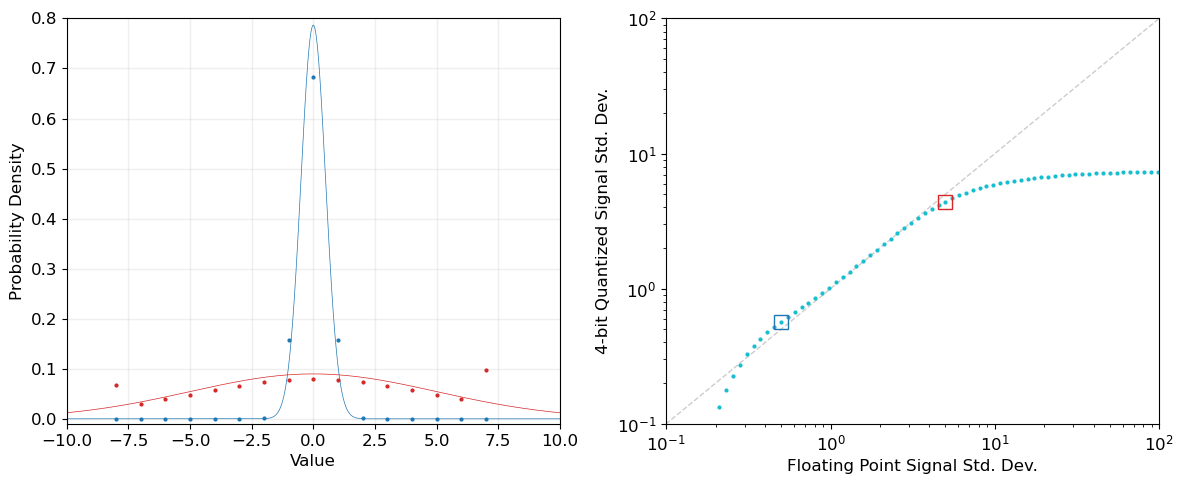

In [72]:
fig, ax = plt.subplots(ncols=2, figsize=(12,5))

colors = ["tab:blue", "tab:red"]
plot_stddevs = [0.5, 5]
for ind, stddev in enumerate(plot_stddevs):
    color = colors[ind]
    quantized_xvals = simulation_scripts.get_quantized_value_options(
        4, 0, signed=True, enforce_symmetry=False
    )
    analytic_xvals = np.arange(-10, 10, .001)
    gaussian_analytic = np.exp(-(analytic_xvals**2) / (2 * stddev**2))
    gaussian_quantized = simulation_scripts.get_probabilities(stddev, quantized_xvals)
    gaussian_analytic /= np.sum(np.exp(-(quantized_xvals**2) / (2 * stddev**2)))
    ax[0].plot(analytic_xvals, gaussian_analytic, color=color, linewidth=0.5)
    ax[0].plot(quantized_xvals, gaussian_quantized, ".", color=color, markersize=4)
    ax[0].set_ylim([-1e-2,.8])
    ax[0].set_xlim([-10, 10])
    ax[0].set_xlabel("Value")
    ax[0].set_ylabel("Probability Density")
    ax[0].grid(True, linewidth=1, alpha=0.2)

quantized_xvals = simulation_scripts.get_quantized_value_options(
    4, 0, signed=True, enforce_symmetry=False
)
point_separation = (np.log(plot_stddevs[1]) - np.log(plot_stddevs[0])) / 24
stddev_array = np.exp(
    np.arange(np.log(plot_stddevs[0]) - point_separation * 20, 1e1, point_separation)
)
variance_array = np.zeros_like(stddev_array)
for ind, stddev in enumerate(stddev_array):
    probability = simulation_scripts.get_probabilities(stddev, quantized_xvals)
    variance_array[ind] = simulation_scripts.calculate_variance(
        quantized_xvals, probability
    )

ax[1].plot([0, 100], [0, 100], "--", color="black", alpha=0.2, linewidth=1)
ax[1].plot(stddev_array, np.sqrt(variance_array), ".", markersize=4, color="tab:cyan")
for ind, stddev in enumerate(plot_stddevs):
    color = colors[ind]
    use_ind = np.where(
        np.abs(stddev_array - stddev) == np.min(np.abs(stddev_array - stddev))
    )[0][0]
    ax[1].plot(
        stddev_array[use_ind],
        np.sqrt(variance_array[use_ind]),
        "s",
        markersize=10,
        markerfacecolor="None",
        markeredgecolor=color,
        markeredgewidth=1,
    )
ax[1].set_xscale("log")
ax[1].set_yscale("log")
ax[1].set_xlim([1e-1, 1e2])
ax[1].set_ylim([1e-1, 1e2])
ax[1].set_xlabel("Floating Point Signal Std. Dev.")
ax[1].set_ylabel("4-bit Quantized Signal Std. Dev.")
plt.tight_layout()

plt.savefig("/Users/ruby/Downloads/quantized_probabilities.png", dpi=300)

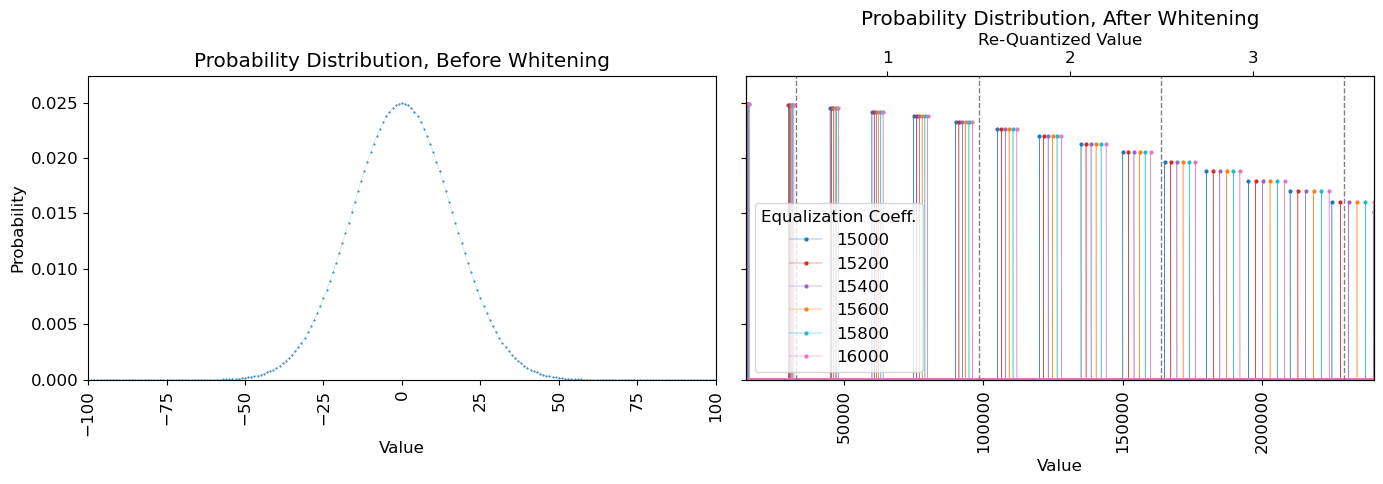

In [73]:
color = "tab:blue"
stddev = 16
requant_gain = 2**16
quantized_xvals = simulation_scripts.get_quantized_value_options(
    18,
    0,
    signed=True,
    enforce_symmetry=False,
)
gaussian_quantized = simulation_scripts.get_probabilities(stddev, quantized_xvals)

fig,ax = plt.subplots(ncols=2, figsize=(14,5), sharey=True)

ax[0].plot(
    quantized_xvals,
    gaussian_quantized,
    ".-",
    color=color,
    markersize=1,
    linewidth=0.1,
)
ax[0].set_xlabel("Value")
ax[0].set_xlim([-100, 100])

ax[0].set_ylim([0, 1.1 * np.max(gaussian_quantized)])
ax[0].tick_params(axis="x", labelrotation=90)
ax[0].set_ylabel("Probability")
ax[0].set_title("Probability Distribution, Before Whitening")

equalized_range = [14900, 240100]
equalized_xvals = np.arange(equalized_range[0], equalized_range[1])
for equalization_coeff in [15000, 15200, 15400, 15600, 15800, 16000]:
    equalized_pdf = np.zeros_like(equalized_xvals, dtype=float)
    for ind in range(len(quantized_xvals)):
        equalized_pdf[
            np.where(equalized_xvals == quantized_xvals[ind] * equalization_coeff)[0]
        ] = gaussian_quantized[ind]
    ax[1].plot(
        equalized_xvals,
        equalized_pdf,
        ".-",
        label=equalization_coeff,
        markersize=4,
        linewidth=0.3,
    )
    ax[1].tick_params(axis="x", labelrotation=90)
    ax[1].set_title("Probability Distribution, After Whitening")
    ax[1].legend(title="Equalization Coeff.")
    ax[1].set_xlabel("Value")
    ax[1].set_xlim(equalized_range)

bin_boundaries = (np.arange(10) - 0.5) * requant_gain
for boundary in bin_boundaries:
    ax[1].plot([boundary, boundary], [0, 1.1 * np.max(gaussian_quantized)], 
        "--",
        color="grey",
        linewidth=1,
    )

ax2 = ax[1].twiny()
ax2.set_xlim(np.array(ax[1].get_xlim())/requantization_gain)
ax2.set_xlabel("Re-Quantized Value")
ax2.xaxis.get_major_locator().set_params(integer=True)

plt.tight_layout()

plt.savefig("/Users/ruby/Downloads/pdf_whitening.png", dpi=300)

In [74]:
eq_coeffs = np.array([8000, 10000, 12000, 14000, 16000])
final_quantized_value_options, final_quantized_probabilities = (
    simulation_scripts.get_requantized_probabilities(
        np.full_like(eq_coeffs, 16, dtype=float),
        eq_coeffs,
        input_bits_total=18,
        input_bits_fractional=0,
        output_bits_total=4,
        output_bits_fractional=0,
        requantization_gain=2**16,
    )
)

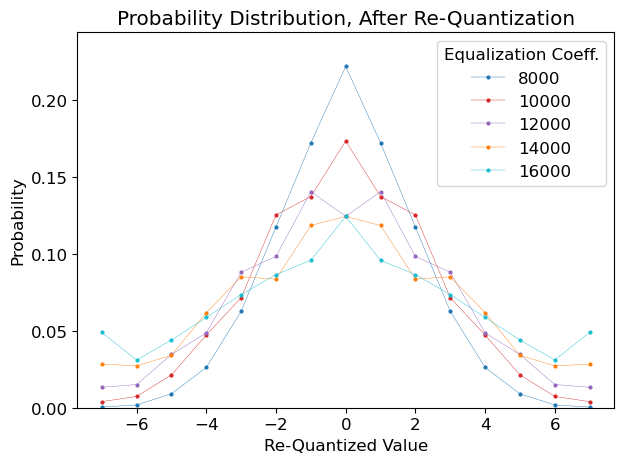

In [75]:
for coeff_ind, eq_coeff in enumerate(eq_coeffs):
    plt.plot(
        final_quantized_value_options,
        final_quantized_probabilities[:, coeff_ind],
        ".-",
        markersize=4,
        linewidth=0.3,
        label=eq_coeff,
    )
plt.xlabel("Re-Quantized Value")
plt.ylabel("Probability")
plt.legend(title="Equalization Coeff.")
plt.ylim([0, 1.1*np.max(final_quantized_probabilities)])
plt.title("Probability Distribution, After Re-Quantization")
plt.tight_layout()
plt.show()

In [76]:
equalization_coeffs = np.arange(2000, 30000)
final_variances, final_autocorrs = simulation_scripts.requantization_sim(
    np.full_like(equalization_coeffs, 16, dtype=float),
    equalization_coeffs,
    input_bits_total=18,
    input_bits_fractional=0,
    output_bits_total=4,
    output_bits_fractional=0,
    requantization_gain=2**16,
)

Processing frequency 1 of 28000.
Processing frequency 2 of 28000.
Processing frequency 3 of 28000.
Processing frequency 4 of 28000.
Processing frequency 5 of 28000.
Processing frequency 6 of 28000.
Processing frequency 7 of 28000.
Processing frequency 8 of 28000.
Processing frequency 9 of 28000.
Processing frequency 10 of 28000.
Processing frequency 11 of 28000.
Processing frequency 12 of 28000.
Processing frequency 13 of 28000.
Processing frequency 14 of 28000.
Processing frequency 15 of 28000.
Processing frequency 16 of 28000.
Processing frequency 17 of 28000.
Processing frequency 18 of 28000.
Processing frequency 19 of 28000.
Processing frequency 20 of 28000.
Processing frequency 21 of 28000.
Processing frequency 22 of 28000.
Processing frequency 23 of 28000.
Processing frequency 24 of 28000.
Processing frequency 25 of 28000.
Processing frequency 26 of 28000.
Processing frequency 27 of 28000.
Processing frequency 28 of 28000.
Processing frequency 29 of 28000.
Processing frequency 30

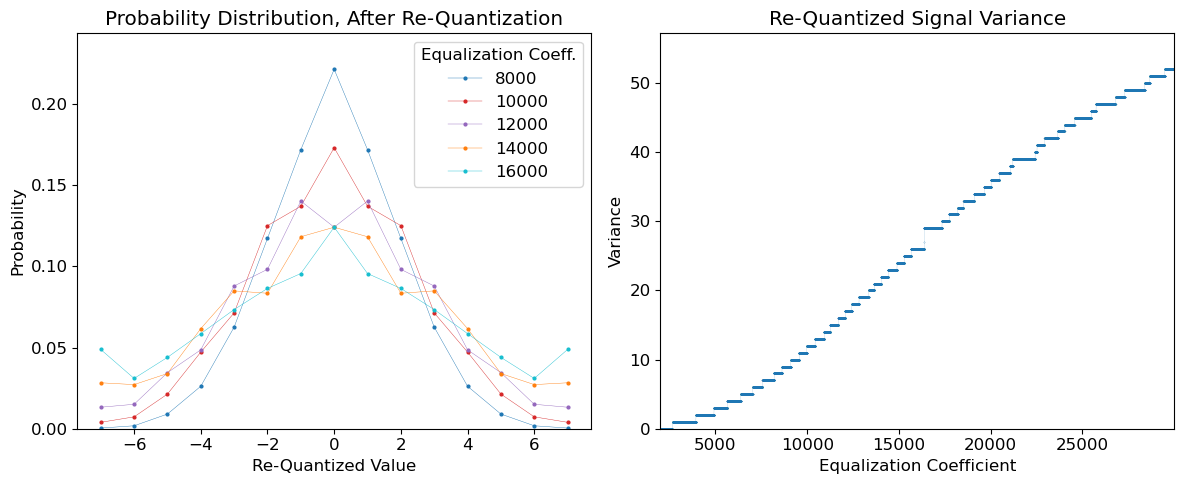

In [77]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 5))

for coeff_ind, eq_coeff in enumerate(eq_coeffs):
    ax[0].plot(
        final_quantized_value_options,
        final_quantized_probabilities[:, coeff_ind],
        ".-",
        markersize=4,
        linewidth=0.3,
        label=eq_coeff,
    )
ax[0].set_xlabel("Re-Quantized Value")
ax[0].set_ylabel("Probability")
ax[0].legend(title="Equalization Coeff.")
ax[0].set_ylim([0, 1.1 * np.max(final_quantized_probabilities)])
ax[0].set_title("Probability Distribution, After Re-Quantization")

ax[1].plot(
    equalization_coeffs,
    final_autocorrs,
    ".-",
    markersize=0.3,
    linewidth=0.1,
)
ax[1].set_ylim([0, 1.1 * np.max(final_autocorrs)])
ax[1].set_xlim([np.min(equalization_coeffs), np.max(equalization_coeffs)])
ax[1].set_xlabel("Equalization Coefficient")
ax[1].set_ylabel("Variance")
ax[1].set_title("Re-Quantized Signal Variance")

plt.tight_layout()
plt.savefig("/Users/ruby/Downloads/pdf_requantized.png", dpi=300)

# How Much Equalization Can We Handle?

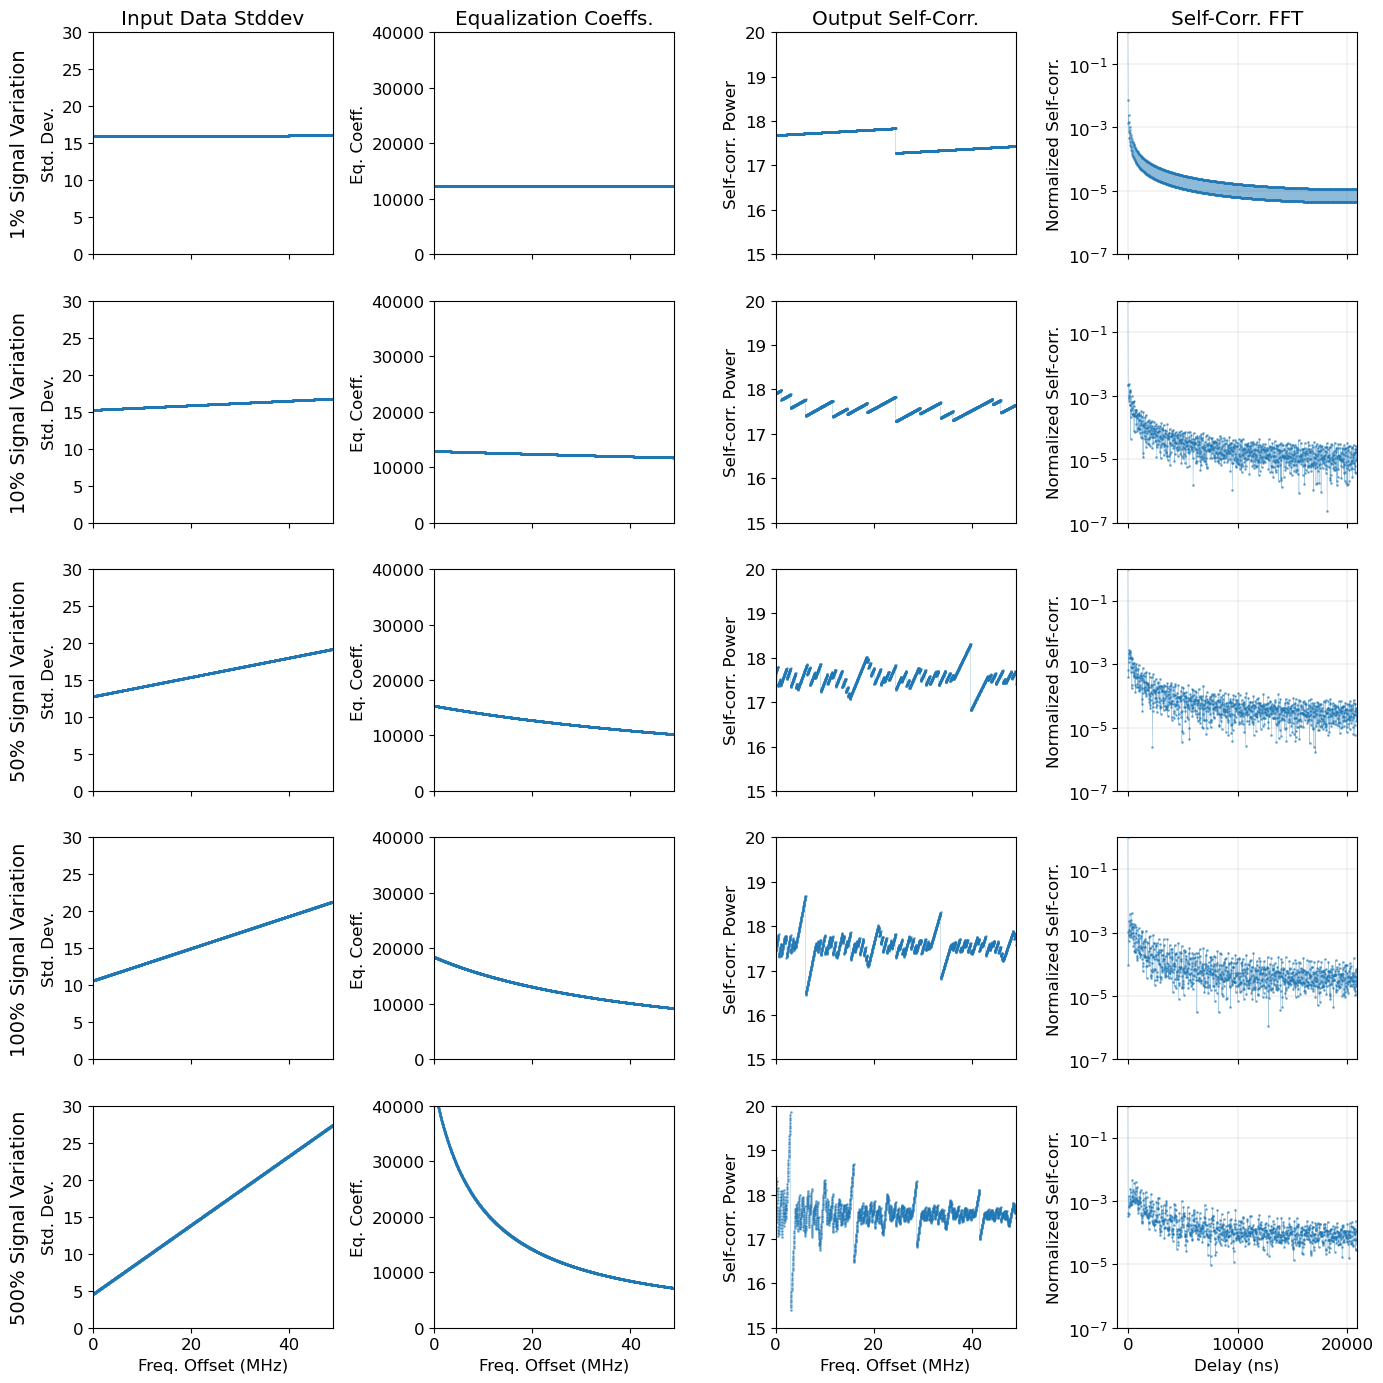

In [78]:
# Load simulations from files
channel_width_mhz = 23925.78125 * 1e-6
nfreqs = 2048
average_signal_stddev = 16
requantization_gain = 2**16
target_value = 3 * requantization_gain
freq_array = np.arange(nfreqs) * channel_width_mhz

fig, ax = plt.subplots(ncols=4, nrows=5, figsize=(14, 14))

for var_ind, use_var in enumerate([0.01, 0.1, 0.5, 1.0, 5]):
    with open(f"const_slope_simulation_output_slope{use_var}.npy", "rb") as f:
        variance = np.load(f)
        autocorr = np.load(f)
    f.close()

    min_signal_stddev = 2 * average_signal_stddev / (2 + use_var)
    max_signal_stddev = 2 * average_signal_stddev - min_signal_stddev
    data_stddev = np.linspace(min_signal_stddev, max_signal_stddev, num=nfreqs)
    eq_coeffs = target_value / data_stddev

    # Delay transform
    autocorrs_fft = np.abs(np.fft.fft(autocorr))[0 : int(len(freq_array) / 2)]
    autocorrs_fft /= np.max(autocorrs_fft)
    delays_ns = (
        np.fft.fftfreq(len(freq_array), d=channel_width_mhz * 1e6)[
            0 : int(len(freq_array) / 2)
        ]
        * 1e9
    )

    ax[var_ind, 0].plot(
        freq_array,
        data_stddev,
        ".-",
        markersize=2,
        linewidth=0.3,
        alpha=0.5,
    )
    ax[var_ind, 1].plot(
        freq_array,
        eq_coeffs,
        ".-",
        markersize=2,
        linewidth=0.3,
        alpha=0.5,
    )
    ax[var_ind, 2].plot(
        freq_array,
        autocorr,
        ".-",
        markersize=2,
        linewidth=0.3,
        alpha=0.5,
    )
    ax[var_ind, 3].plot(
        delays_ns,
        autocorrs_fft,
        ".-",
        markersize=2,
        linewidth=0.3,
        alpha=0.5,
    )

    ax[var_ind, 0].set_xlim([np.min(freq_array), np.max(freq_array)])
    ax[var_ind, 0].set_ylim([0, 30])
    ax[var_ind, 0].set_ylabel("Std. Dev.")

    ax[var_ind, 1].set_xlim([np.min(freq_array), np.max(freq_array)])
    ax[var_ind, 1].set_ylim([0, 40000])
    ax[var_ind, 1].set_ylabel("Eq. Coeff.")

    ax[var_ind, 2].set_xlim([np.min(freq_array), np.max(freq_array)])
    ax[var_ind, 2].set_ylim([15, 20])
    ax[var_ind, 2].set_ylabel("Self-corr. Power")

    ax[var_ind, 3].set_yscale("log")
    ax[var_ind, 3].set_xlim([np.min(delays_ns)-1000, np.max(delays_ns)])
    ax[var_ind, 3].set_ylim([1e-7, 1])
    ax[var_ind, 3].grid(True, linewidth=.2, alpha=1)
    ax[var_ind, 3].set_ylabel("Normalized Self-corr.")
    # fig.suptitle(f"Average Eq. Coeff. {avg_eq_coeff}")
    if var_ind != 4:
        ax[var_ind, 0].tick_params(labelbottom=False)
        ax[var_ind, 1].tick_params(labelbottom=False)
        ax[var_ind, 2].tick_params(labelbottom=False)
        ax[var_ind, 3].tick_params(labelbottom=False)


ax[0, 0].set_title("Input Data Stddev")
ax[0, 1].set_title("Equalization Coeffs.")
ax[0, 2].set_title("Output Self-Corr.")
ax[0, 3].set_title("Self-Corr. FFT")

ax[4, 0].set_xlabel("Freq. Offset (MHz)")
ax[4, 1].set_xlabel("Freq. Offset (MHz)")
ax[4, 2].set_xlabel("Freq. Offset (MHz)")
ax[4, 3].set_xlabel("Delay (ns)")

row_labels = [
    "1% Signal Variation",
    "10% Signal Variation",
    "50% Signal Variation",
    "100% Signal Variation",
    "500% Signal Variation",
]

for i, label in enumerate(row_labels):
    ax[i, 0].annotate(
        label,
        xy=(0, 0.5),
        xytext=(-ax[i, 0].yaxis.labelpad - 5, 0),
        xycoords=ax[i, 0].yaxis.label,
        textcoords="offset points",
        ha="right",
        va="center",
        rotation=90,
        fontsize=14,
        #fontweight="bold",
    )

plt.tight_layout()
plt.savefig("/Users/ruby/Downloads/constant_slope_sims.png", dpi=300)
plt.show()

In [79]:
10 * np.log10(6 ** 2)

15.563025007672874

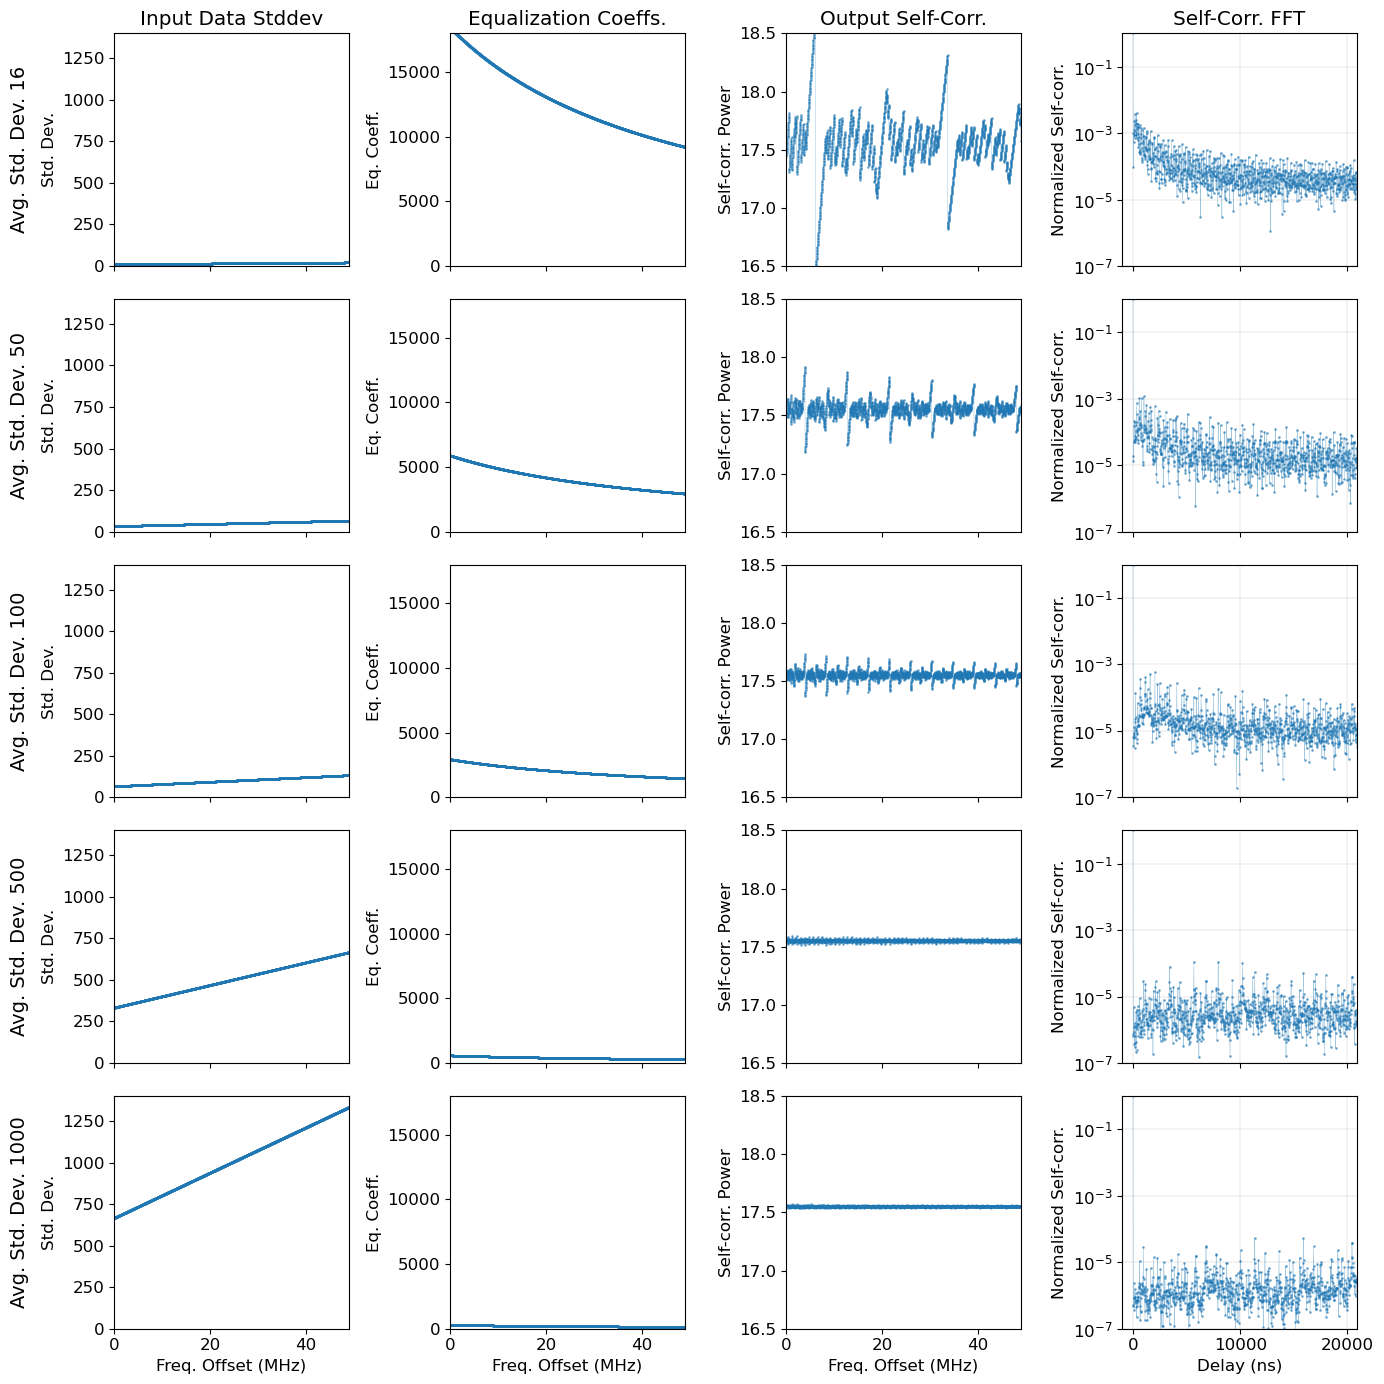

In [80]:
# Load simulations from files
channel_width_mhz = 23925.78125 * 1e-6
nfreqs = 2048
use_var = 1.0
requantization_gain = 2**16
target_value = 3 * requantization_gain
freq_array = np.arange(nfreqs) * channel_width_mhz

fig, ax = plt.subplots(ncols=4, nrows=5, figsize=(14, 14))

for signal_ind, avg_signal in enumerate([16., 50., 100., 500., 1000.0]):
    if avg_signal == 16.0:
        filename = f"const_slope_simulation_output_slope{use_var}.npy"
    else:
        filename = f"const_slope_simulation_output_slope{use_var}_avg_signal{avg_signal}.npy"
    with open(filename, "rb") as f:
        variance = np.load(f)
        autocorr = np.load(f)
    f.close()

    min_signal_stddev = 2 * avg_signal / (2 + use_var)
    max_signal_stddev = 2 * avg_signal - min_signal_stddev
    data_stddev = np.linspace(min_signal_stddev, max_signal_stddev, num=nfreqs)
    eq_coeffs = target_value / data_stddev

    # Delay transform
    autocorrs_fft = np.abs(np.fft.fft(autocorr))[0 : int(len(freq_array) / 2)]
    autocorrs_fft /= np.max(autocorrs_fft)
    delays_ns = (
        np.fft.fftfreq(len(freq_array), d=channel_width_mhz * 1e6)[
            0 : int(len(freq_array) / 2)
        ]
        * 1e9
    )

    ax[signal_ind, 0].plot(
        freq_array,
        data_stddev,
        ".-",
        markersize=2,
        linewidth=0.3,
        alpha=0.5,
    )
    ax[signal_ind, 1].plot(
        freq_array,
        eq_coeffs,
        ".-",
        markersize=2,
        linewidth=0.3,
        alpha=0.5,
    )
    ax[signal_ind, 2].plot(
        freq_array,
        autocorr,
        ".-",
        markersize=2,
        linewidth=0.3,
        alpha=0.5,
    )
    ax[signal_ind, 3].plot(
        delays_ns,
        autocorrs_fft,
        ".-",
        markersize=2,
        linewidth=0.3,
        alpha=0.5,
    )

    ax[signal_ind, 0].set_xlim([np.min(freq_array), np.max(freq_array)])
    ax[signal_ind, 0].set_ylim([0, 1400])
    ax[signal_ind, 0].set_ylabel("Std. Dev.")

    ax[signal_ind, 1].set_xlim([np.min(freq_array), np.max(freq_array)])
    ax[signal_ind, 1].set_ylim([0, 18000])
    ax[signal_ind, 1].set_ylabel("Eq. Coeff.")

    ax[signal_ind, 2].set_xlim([np.min(freq_array), np.max(freq_array)])
    ax[signal_ind, 2].set_ylim([16.5, 18.5])
    ax[signal_ind, 2].set_ylabel("Self-corr. Power")

    ax[signal_ind, 3].set_yscale("log")
    ax[signal_ind, 3].set_xlim([np.min(delays_ns) - 1000, np.max(delays_ns)])
    ax[signal_ind, 3].set_ylim([1e-7, 1])
    ax[signal_ind, 3].grid(True, linewidth=0.2, alpha=1)
    ax[signal_ind, 3].set_ylabel("Normalized Self-corr.")
    # fig.suptitle(f"Average Eq. Coeff. {avg_eq_coeff}")
    if signal_ind != 4:
        ax[signal_ind, 0].tick_params(labelbottom=False)
        ax[signal_ind, 1].tick_params(labelbottom=False)
        ax[signal_ind, 2].tick_params(labelbottom=False)
        ax[signal_ind, 3].tick_params(labelbottom=False)


ax[0, 0].set_title("Input Data Stddev")
ax[0, 1].set_title("Equalization Coeffs.")
ax[0, 2].set_title("Output Self-Corr.")
ax[0, 3].set_title("Self-Corr. FFT")

ax[4, 0].set_xlabel("Freq. Offset (MHz)")
ax[4, 1].set_xlabel("Freq. Offset (MHz)")
ax[4, 2].set_xlabel("Freq. Offset (MHz)")
ax[4, 3].set_xlabel("Delay (ns)")

row_labels = [
    "Avg. Std. Dev. 16",
    "Avg. Std. Dev. 50",
    "Avg. Std. Dev. 100",
    "Avg. Std. Dev. 500",
    "Avg. Std. Dev. 1000",
]

for i, label in enumerate(row_labels):
    ax[i, 0].annotate(
        label,
        xy=(0, 0.5),
        xytext=(-ax[i, 0].yaxis.labelpad - 5, 0),
        xycoords=ax[i, 0].yaxis.label,
        textcoords="offset points",
        ha="right",
        va="center",
        rotation=90,
        fontsize=14,
        # fontweight="bold",
    )

plt.tight_layout()
plt.savefig("/Users/ruby/Downloads/power_variation_sims.png", dpi=300)
plt.show()

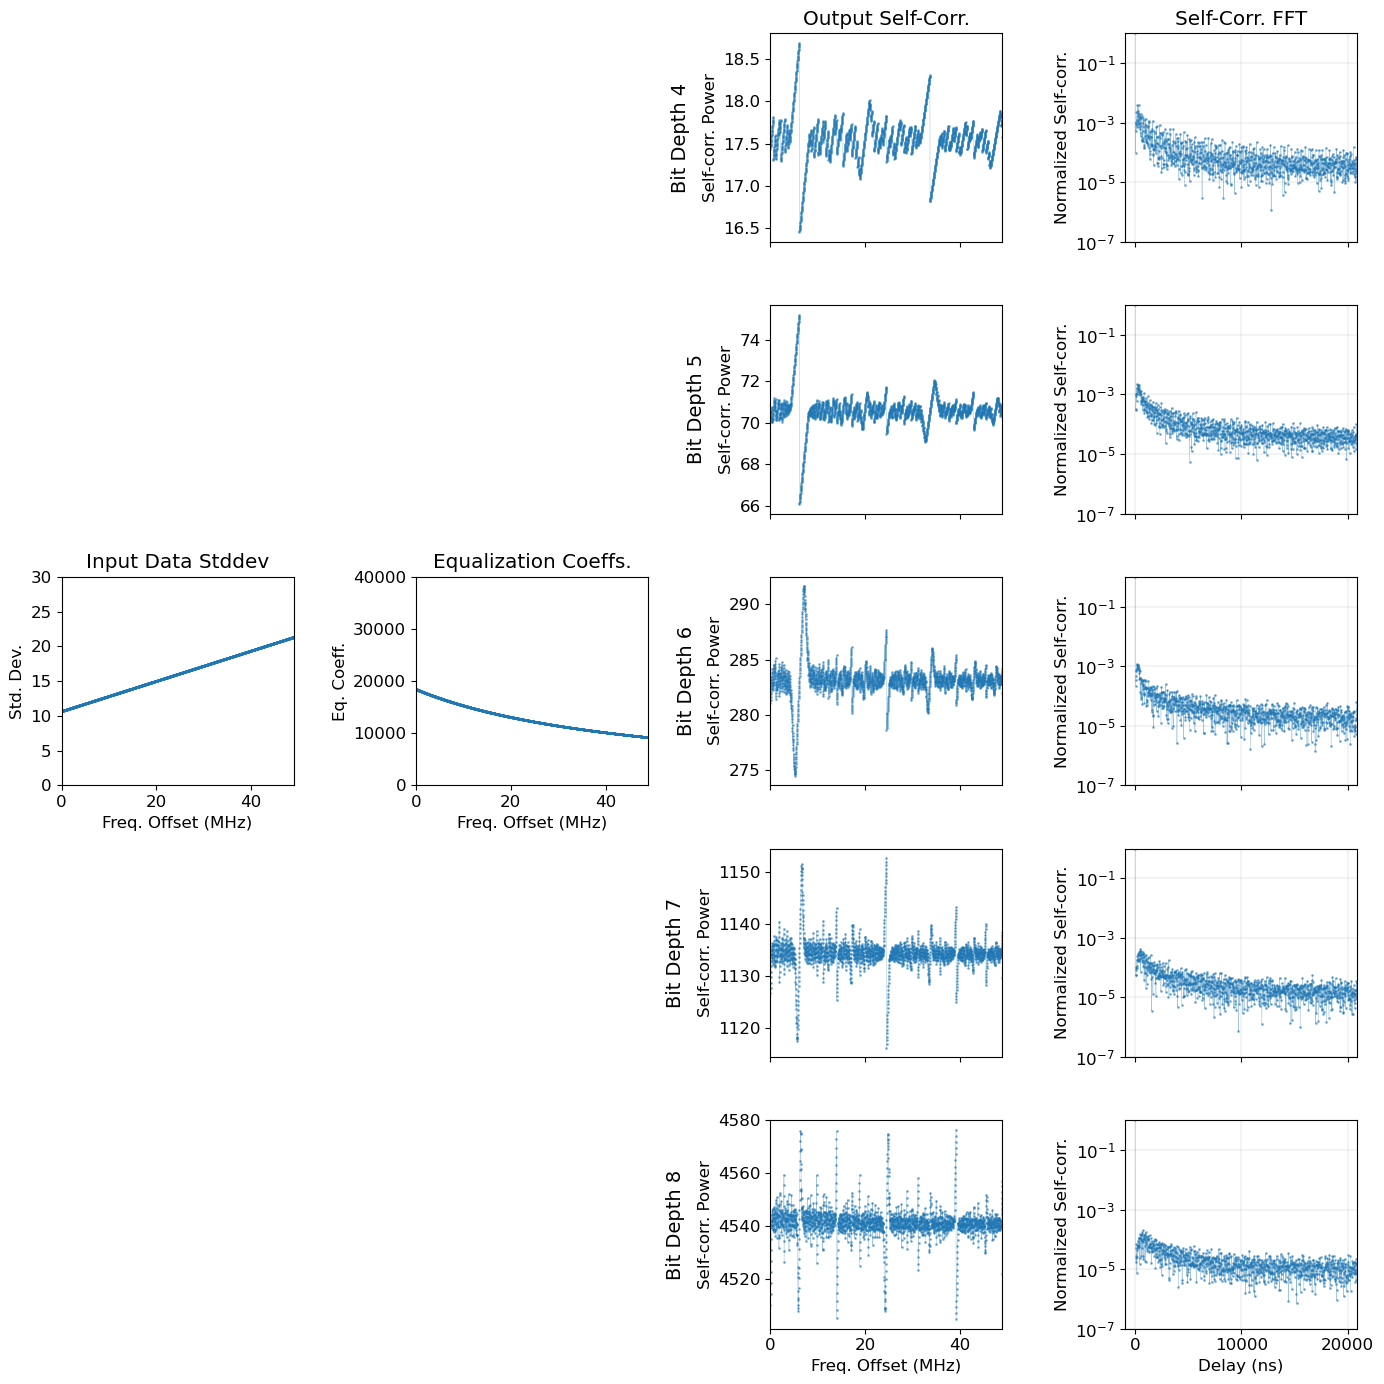

In [81]:
# Load simulations from files
channel_width_mhz = 23925.78125 * 1e-6
nfreqs = 2048
use_var = 1.0
avg_signal = 16
requantization_gain = 2**16
target_value = 3 * requantization_gain
freq_array = np.arange(nfreqs) * channel_width_mhz
plot_bit_depths = [4, 5, 6, 7, 8]

fig = plt.figure(figsize=(14, 14))
ax = np.full((len(plot_bit_depths), 4), None)
ax[0, 0] = plt.subplot2grid(
    (2 * len(plot_bit_depths), 4), (4, 0), rowspan=2
)
ax[0, 1] = plt.subplot2grid(
    (2 * len(plot_bit_depths), 4), (4, 1), rowspan=2
)
for i in range(len(plot_bit_depths)):
    ax[i, 2] = plt.subplot2grid((2 * len(plot_bit_depths), 4), (2 * i, 2), rowspan=2)
    ax[i, 3] = plt.subplot2grid((2 * len(plot_bit_depths), 4), (2 * i, 3), rowspan=2)

for signal_ind, bit_depth in enumerate(plot_bit_depths):
    if bit_depth == 4:
        filename = f"const_slope_simulation_output_slope{use_var}.npy"
    else:
        filename = (
            f"const_slope_simulation_output_slope{use_var}_bit_depth{bit_depth}.npy"
        )
    with open(filename, "rb") as f:
        variance = np.load(f)
        autocorr = np.load(f)
    f.close()

    min_signal_stddev = 2 * avg_signal / (2 + use_var)
    max_signal_stddev = 2 * avg_signal - min_signal_stddev
    data_stddev = np.linspace(min_signal_stddev, max_signal_stddev, num=nfreqs)
    eq_coeffs = target_value / data_stddev

    # Delay transform
    autocorrs_fft = np.abs(np.fft.fft(autocorr))[0 : int(len(freq_array) / 2)]
    autocorrs_fft /= np.max(autocorrs_fft)
    delays_ns = (
        np.fft.fftfreq(len(freq_array), d=channel_width_mhz * 1e6)[
            0 : int(len(freq_array) / 2)
        ]
        * 1e9
    )

    if signal_ind == 0:
        ax[signal_ind, 0].plot(
            freq_array,
            data_stddev,
            ".-",
            markersize=2,
            linewidth=0.3,
            alpha=0.5,
        )
        ax[signal_ind, 1].plot(
            freq_array,
            eq_coeffs,
            ".-",
            markersize=2,
            linewidth=0.3,
            alpha=0.5,
        )
    ax[signal_ind, 2].plot(
        freq_array,
        autocorr,
        ".-",
        markersize=2,
        linewidth=0.3,
        alpha=0.5,
    )
    ax[signal_ind, 3].plot(
        delays_ns,
        autocorrs_fft,
        ".-",
        markersize=2,
        linewidth=0.3,
        alpha=0.5,
    )

    if signal_ind == 0:
        ax[signal_ind, 0].set_xlim([np.min(freq_array), np.max(freq_array)])
        ax[signal_ind, 0].set_ylim([0, 30])
        ax[signal_ind, 0].set_ylabel("Std. Dev.")

        ax[signal_ind, 1].set_xlim([np.min(freq_array), np.max(freq_array)])
        ax[signal_ind, 1].set_ylim([0, 40000])
        ax[signal_ind, 1].set_ylabel("Eq. Coeff.")

    ax[signal_ind, 2].set_xlim([np.min(freq_array), np.max(freq_array)])
    # ax[signal_ind, 2].set_ylim([16.5, 18.5])
    ax[signal_ind, 2].set_ylabel("Self-corr. Power")

    ax[signal_ind, 3].set_yscale("log")
    ax[signal_ind, 3].set_xlim([np.min(delays_ns) - 1000, np.max(delays_ns)])
    ax[signal_ind, 3].set_ylim([1e-7, 1])
    ax[signal_ind, 3].grid(True, linewidth=0.2, alpha=1)
    ax[signal_ind, 3].set_ylabel("Normalized Self-corr.")
    # fig.suptitle(f"Average Eq. Coeff. {avg_eq_coeff}")
    if signal_ind != 4:
        # ax[signal_ind, 0].tick_params(labelbottom=False)
        # ax[signal_ind, 1].tick_params(labelbottom=False)
        ax[signal_ind, 2].tick_params(labelbottom=False)
        ax[signal_ind, 3].tick_params(labelbottom=False)


ax[0, 0].set_title("Input Data Stddev")
ax[0, 1].set_title("Equalization Coeffs.")
ax[0, 2].set_title("Output Self-Corr.")
ax[0, 3].set_title("Self-Corr. FFT")

ax[0, 0].set_xlabel("Freq. Offset (MHz)")
ax[0, 1].set_xlabel("Freq. Offset (MHz)")
ax[4, 2].set_xlabel("Freq. Offset (MHz)")
ax[4, 3].set_xlabel("Delay (ns)")

row_labels = [f"Bit Depth {i}" for i in plot_bit_depths]

for i, label in enumerate(row_labels):
    ax[i, 2].annotate(
        label,
        xy=(0, 0.5),
        xytext=(-ax[i, 2].yaxis.labelpad - 5, 0),
        xycoords=ax[i, 2].yaxis.label,
        textcoords="offset points",
        ha="right",
        va="center",
        rotation=90,
        fontsize=14,
        # fontweight="bold",
    )

plt.tight_layout()
plt.savefig("/Users/ruby/Downloads/bit_depth_variation_sims.png", dpi=300)
plt.show()

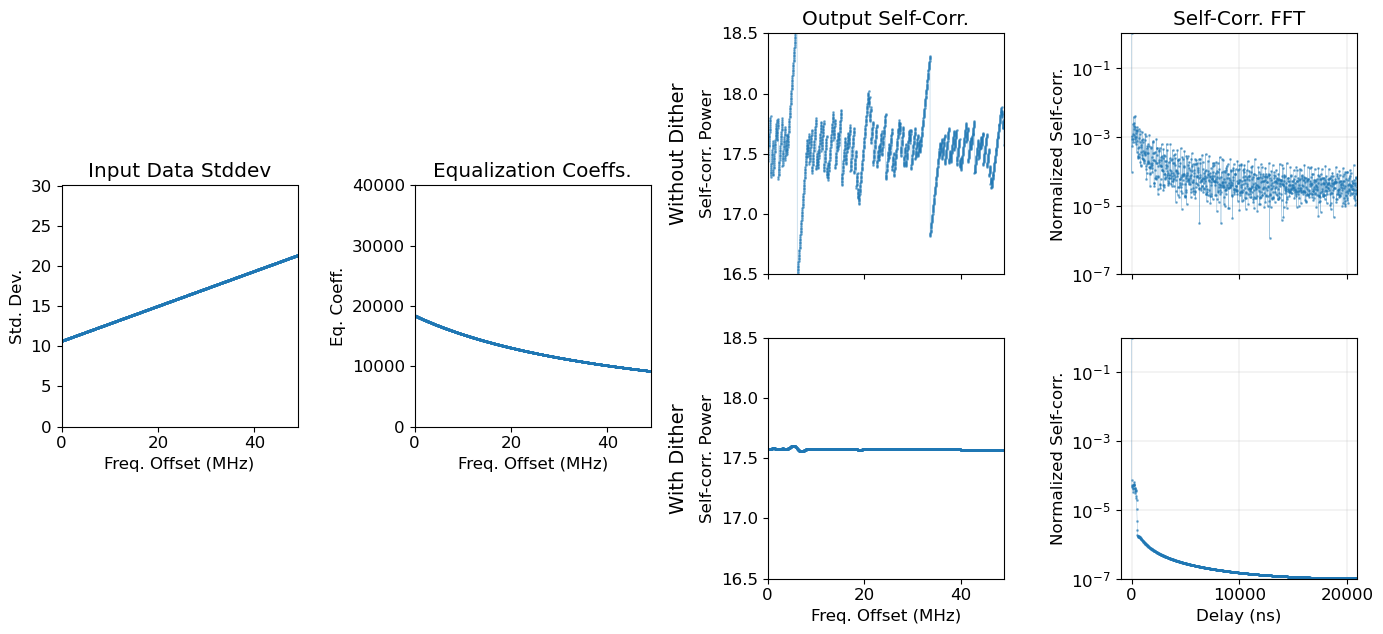

In [82]:
# Load simulations from files
channel_width_mhz = 23925.78125 * 1e-6
nfreqs = 2048
use_var = 1.0
avg_signal = 16
requantization_gain = 2**16
target_value = 3 * requantization_gain
freq_array = np.arange(nfreqs) * channel_width_mhz
plot_simulations = [
    "const_slope_simulation_output_slope1.0.npy",
    "const_slope_simulation_output_dither_floating_point.npy",
]

fig = plt.figure(figsize=(14, 6.5))
ax = np.full((len(plot_simulations), 4), None)
ax[0, 0] = plt.subplot2grid((2 * len(plot_simulations), 4), (1, 0), rowspan=2)
ax[0, 1] = plt.subplot2grid((2 * len(plot_simulations), 4), (1, 1), rowspan=2)
for i in range(len(plot_simulations)):
    ax[i, 2] = plt.subplot2grid((2 * len(plot_simulations), 4), (2 * i, 2), rowspan=2)
    ax[i, 3] = plt.subplot2grid((2 * len(plot_simulations), 4), (2 * i, 3), rowspan=2)

for signal_ind, filename in enumerate(plot_simulations):

    with open(filename, "rb") as f:
        variance = np.load(f)
        autocorr = np.load(f)
    f.close()

    min_signal_stddev = 2 * avg_signal / (2 + use_var)
    max_signal_stddev = 2 * avg_signal - min_signal_stddev
    data_stddev = np.linspace(min_signal_stddev, max_signal_stddev, num=nfreqs)
    eq_coeffs = target_value / data_stddev

    # Delay transform
    autocorrs_fft = np.abs(np.fft.fft(autocorr))[0 : int(len(freq_array) / 2)]
    autocorrs_fft /= np.max(autocorrs_fft)
    delays_ns = (
        np.fft.fftfreq(len(freq_array), d=channel_width_mhz * 1e6)[
            0 : int(len(freq_array) / 2)
        ]
        * 1e9
    )

    if signal_ind == 0:
        ax[signal_ind, 0].plot(
            freq_array,
            data_stddev,
            ".-",
            markersize=2,
            linewidth=0.3,
            alpha=0.5,
        )
        ax[signal_ind, 1].plot(
            freq_array,
            eq_coeffs,
            ".-",
            markersize=2,
            linewidth=0.3,
            alpha=0.5,
        )
    ax[signal_ind, 2].plot(
        freq_array,
        autocorr,
        ".-",
        markersize=2,
        linewidth=0.3,
        alpha=0.5,
    )
    ax[signal_ind, 3].plot(
        delays_ns,
        autocorrs_fft,
        ".-",
        markersize=2,
        linewidth=0.3,
        alpha=0.5,
    )

    if signal_ind == 0:
        ax[signal_ind, 0].set_xlim([np.min(freq_array), np.max(freq_array)])
        ax[signal_ind, 0].set_ylim([0, 30])
        ax[signal_ind, 0].set_ylabel("Std. Dev.")

        ax[signal_ind, 1].set_xlim([np.min(freq_array), np.max(freq_array)])
        ax[signal_ind, 1].set_ylim([0, 40000])
        ax[signal_ind, 1].set_ylabel("Eq. Coeff.")

    ax[signal_ind, 2].set_xlim([np.min(freq_array), np.max(freq_array)])
    ax[signal_ind, 2].set_ylim([16.5, 18.5])
    ax[signal_ind, 2].set_ylabel("Self-corr. Power")

    ax[signal_ind, 3].set_yscale("log")
    ax[signal_ind, 3].set_xlim([np.min(delays_ns) - 1000, np.max(delays_ns)])
    ax[signal_ind, 3].set_ylim([1e-7, 1])
    ax[signal_ind, 3].grid(True, linewidth=0.2, alpha=1)
    ax[signal_ind, 3].set_ylabel("Normalized Self-corr.")
    # fig.suptitle(f"Average Eq. Coeff. {avg_eq_coeff}")
    if signal_ind != 1:
        # ax[signal_ind, 0].tick_params(labelbottom=False)
        # ax[signal_ind, 1].tick_params(labelbottom=False)
        ax[signal_ind, 2].tick_params(labelbottom=False)
        ax[signal_ind, 3].tick_params(labelbottom=False)


ax[0, 0].set_title("Input Data Stddev")
ax[0, 1].set_title("Equalization Coeffs.")
ax[0, 2].set_title("Output Self-Corr.")
ax[0, 3].set_title("Self-Corr. FFT")

ax[0, 0].set_xlabel("Freq. Offset (MHz)")
ax[0, 1].set_xlabel("Freq. Offset (MHz)")
ax[1, 2].set_xlabel("Freq. Offset (MHz)")
ax[1, 3].set_xlabel("Delay (ns)")

row_labels = ["Without Dither", "With Dither"]

for i, label in enumerate(row_labels):
    ax[i, 2].annotate(
        label,
        xy=(0, 0.5),
        xytext=(-ax[i, 2].yaxis.labelpad - 5, 0),
        xycoords=ax[i, 2].yaxis.label,
        textcoords="offset points",
        ha="right",
        va="center",
        rotation=90,
        fontsize=14,
        # fontweight="bold",
    )

plt.tight_layout()
plt.savefig("/Users/ruby/Downloads/dithering.png", dpi=300)
plt.show()

In [83]:
color = "tab:blue"
stddev = 16
requant_gain = 2**16
quantized_xvals = simulation_scripts.get_quantized_value_options(
    18,
    0,
    signed=True,
    enforce_symmetry=False,
)
gaussian_quantized = simulation_scripts.get_probabilities(stddev, quantized_xvals)

In [84]:
fig, ax = plt.subplots(ncols=2, figsize=(14, 5), sharey=False)

dither_stddev = 0.1 * requantization_gain
dither_xvals = np.arange(int(-6 * dither_stddev), int(6 * dither_stddev) + 1)
dither_pd = np.exp(-(dither_xvals**2) / (2 * dither_stddev**2))  # Go out to 6 sigma
dither_pd /= np.sum(dither_pd)

equalized_range = [14900, 240100]
equalized_xvals = np.arange(
    equalized_range[0] + np.min(dither_xvals), equalized_range[1] + np.max(dither_xvals)
)  # Need to extend calculated values to cover convolution

for equalization_coeff in [15000, 15200, 15400, 15600, 15800, 16000]:
#for equalization_coeff in [15000]:
    equalized_pdf = np.zeros_like(equalized_xvals, dtype=float)
    for ind in range(len(quantized_xvals)):
        equalized_pdf[
            np.where(equalized_xvals == quantized_xvals[ind] * equalization_coeff)[0]
        ] = gaussian_quantized[ind]
    ax[0].plot(
        equalized_xvals,
        equalized_pdf,
        ".-",
        label=equalization_coeff,
        markersize=4,
        linewidth=0.3,
    )
    equalized_dithered_pdf = np.convolve(
        equalized_pdf, dither_pd, mode="full"
    )[int(len(dither_pd) / 2) : -int(len(dither_pd) / 2)]
    ax[1].plot(
        equalized_xvals,
        equalized_dithered_pdf,
        "-",
        label=equalization_coeff,
        markersize=4,
        linewidth=1,
    )

ax[0].tick_params(axis="x", labelrotation=90)
ax[0].set_title("Probability Distribution, After Whitening, No Dither")
ax[0].legend(title="Equalization Coeff.")
ax[0].set_xlabel("Value")
ax[0].set_ylabel("Probability")
ax[0].set_xlim(equalized_range)
ax[0].set_ylim([0, 1.1 * np.max(gaussian_quantized)])

ax[1].tick_params(axis="x", labelrotation=90)
ax[1].set_title("Probability Distribution, After Whitening, With Dither")
ax[1].set_xlabel("Value")
ax[1].set_ylabel("Probability")
ax[1].set_xlim(equalized_range)
ax[1].set_ylim([0, 1.1 * np.max(equalized_dithered_pdf)])
ax[1].ticklabel_format(style="plain", axis="y", scilimits=(0, 0))

for ax_ind in range(2):
    bin_boundaries = (np.arange(10) - 0.5) * requant_gain
    for boundary in bin_boundaries:
        ax[ax_ind].plot(
            [boundary, boundary],
            [0, 1.1 * np.max(gaussian_quantized)],
            "--",
            color="grey",
            linewidth=1,
        )
    ax2 = ax[ax_ind].twiny()
    ax2.set_xlim(np.array(ax[0].get_xlim()) / requantization_gain)
    ax2.set_xlabel("Re-Quantized Value")
    ax2.xaxis.get_major_locator().set_params(integer=True)

plt.tight_layout()

plt.savefig("/Users/ruby/Downloads/pdf_dithering.png", dpi=300)

Error in callback <function flush_figures at 0x117186e60> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 